In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization,
    Activation, LeakyReLU
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


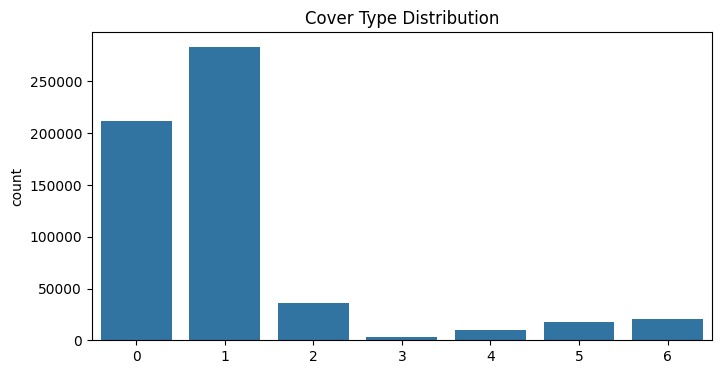

In [ ]:
# Load dataset
data = fetch_covtype()
X = data.data
y = data.target - 1  # 0-based labels

# Class imbalance visualization
plt.figure(figsize=(8,4))
sns.countplot(x=y)
plt.title("Cover Type Distribution")
plt.show()

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def build_model(activation='relu', optimizer_name='adam'):
    model = Sequential()
    model.add(Dense(256, kernel_regularizer=l2(1e-3), input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())

    if activation == 'leakyrelu':
        model.add(LeakyReLU())
    else:
        model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(128, kernel_regularizer=l2(1e-3)))
    model.add(BatchNormalization())
    if activation == 'leakyrelu':
        model.add(LeakyReLU())
    else:
        model.add(Activation(activation))
    model.add(Dropout(0.4))

    model.add(Dense(64, kernel_regularizer=l2(1e-3)))
    model.add(BatchNormalization())
    if activation == 'leakyrelu':
        model.add(LeakyReLU())
    else:
        model.add(Activation(activation))
    model.add(Dropout(0.3))

    model.add(Dense(7, activation='softmax'))

    optimizers = {
        'adam': Adam(learning_rate=1e-3),
        'rmsprop': RMSprop(learning_rate=1e-3),
        'sgd': SGD(learning_rate=1e-2, momentum=0.9)
    }
    model.compile(
        optimizer=optimizers[optimizer_name],
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
]

configs = [
    ('relu', 'adam'),
    ('leakyrelu', 'rmsprop'),
    ('selu', 'sgd')
]


In [ ]:
results = {}
histories = {}

for act, opt in configs:
    print(f"\nTraining: Activation={act.upper()}, Optimizer={opt.upper()}")
    model = build_model(activation=act, optimizer_name=opt)

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=256,
        callbacks=callbacks,
        verbose=2
    )

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy = {acc:.4f}")

    y_pred = np.argmax(model.predict(X_test), axis=1)
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    histories[f'{act}_{opt}'] = history
    results[f'{act}_{opt}'] = {'accuracy': acc, 'report': report, 'confusion_matrix': cm}



Training: Activation=RELU, Optimizer=ADAM


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1453/1453 - 21s - 14ms/step - accuracy: 0.6977 - loss: 0.8993 - val_accuracy: 0.7507 - val_loss: 0.6488 - learning_rate: 1.0000e-03
Epoch 2/50
1453/1453 - 19s - 13ms/step - accuracy: 0.7397 - loss: 0.6686 - val_accuracy: 0.7702 - val_loss: 0.5894 - learning_rate: 1.0000e-03
Epoch 3/50
1453/1453 - 20s - 14ms/step - accuracy: 0.7490 - loss: 0.6405 - val_accuracy: 0.7731 - val_loss: 0.5749 - learning_rate: 1.0000e-03
Epoch 4/50
1453/1453 - 22s - 15ms/step - accuracy: 0.7538 - loss: 0.6283 - val_accuracy: 0.7775 - val_loss: 0.5624 - learning_rate: 1.0000e-03
Epoch 5/50
1453/1453 - 15s - 11ms/step - accuracy: 0.7578 - loss: 0.6229 - val_accuracy: 0.7858 - val_loss: 0.5566 - learning_rate: 1.0000e-03
Epoch 6/50
1453/1453 - 20s - 14ms/step - accuracy: 0.7614 - loss: 0.6159 - val_accuracy: 0.7904 - val_loss: 0.5487 - learning_rate: 1.0000e-03
Epoch 7/50
1453/1453 - 16s - 11ms/step - accuracy: 0.7644 - loss: 0.6120 - val_accuracy: 0.7946 - val_loss: 0.5386 - learning_rate: 1.0000e-03

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1453/1453 - 17s - 12ms/step - accuracy: 0.7007 - loss: 0.8703 - val_accuracy: 0.7438 - val_loss: 0.6555 - learning_rate: 1.0000e-03
Epoch 2/50
1453/1453 - 20s - 14ms/step - accuracy: 0.7314 - loss: 0.6753 - val_accuracy: 0.7492 - val_loss: 0.6154 - learning_rate: 1.0000e-03
Epoch 3/50
1453/1453 - 14s - 9ms/step - accuracy: 0.7360 - loss: 0.6585 - val_accuracy: 0.7531 - val_loss: 0.6092 - learning_rate: 1.0000e-03
Epoch 4/50
1453/1453 - 13s - 9ms/step - accuracy: 0.7391 - loss: 0.6547 - val_accuracy: 0.7546 - val_loss: 0.6075 - learning_rate: 1.0000e-03
Epoch 5/50
1453/1453 - 14s - 9ms/step - accuracy: 0.7399 - loss: 0.6532 - val_accuracy: 0.7553 - val_loss: 0.6052 - learning_rate: 1.0000e-03
Epoch 6/50
1453/1453 - 14s - 10ms/step - accuracy: 0.7399 - loss: 0.6534 - val_accuracy: 0.7551 - val_loss: 0.6054 - learning_rate: 1.0000e-03
Epoch 7/50
1453/1453 - 14s - 10ms/step - accuracy: 0.7406 - loss: 0.6538 - val_accuracy: 0.7586 - val_loss: 0.6047 - learning_rate: 1.0000e-03
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1453/1453 - 18s - 12ms/step - accuracy: 0.6831 - loss: 1.0262 - val_accuracy: 0.7250 - val_loss: 0.8444 - learning_rate: 0.0100
Epoch 2/50
1453/1453 - 19s - 13ms/step - accuracy: 0.7103 - loss: 0.8324 - val_accuracy: 0.7291 - val_loss: 0.7454 - learning_rate: 0.0100
Epoch 3/50
1453/1453 - 21s - 14ms/step - accuracy: 0.7170 - loss: 0.7509 - val_accuracy: 0.7339 - val_loss: 0.6848 - learning_rate: 0.0100
Epoch 4/50
1453/1453 - 15s - 10ms/step - accuracy: 0.7211 - loss: 0.7048 - val_accuracy: 0.7389 - val_loss: 0.6526 - learning_rate: 0.0100
Epoch 5/50
1453/1453 - 15s - 10ms/step - accuracy: 0.7236 - loss: 0.6815 - val_accuracy: 0.7421 - val_loss: 0.6291 - learning_rate: 0.0100
Epoch 6/50
1453/1453 - 14s - 10ms/step - accuracy: 0.7256 - loss: 0.6669 - val_accuracy: 0.7363 - val_loss: 0.6226 - learning_rate: 0.0100
Epoch 7/50
1453/1453 - 20s - 14ms/step - accuracy: 0.7268 - loss: 0.6592 - val_accuracy: 0.7418 - val_loss: 0.6170 - learning_rate: 0.0100
Epoch 8/50
1453/1453 - 22s 

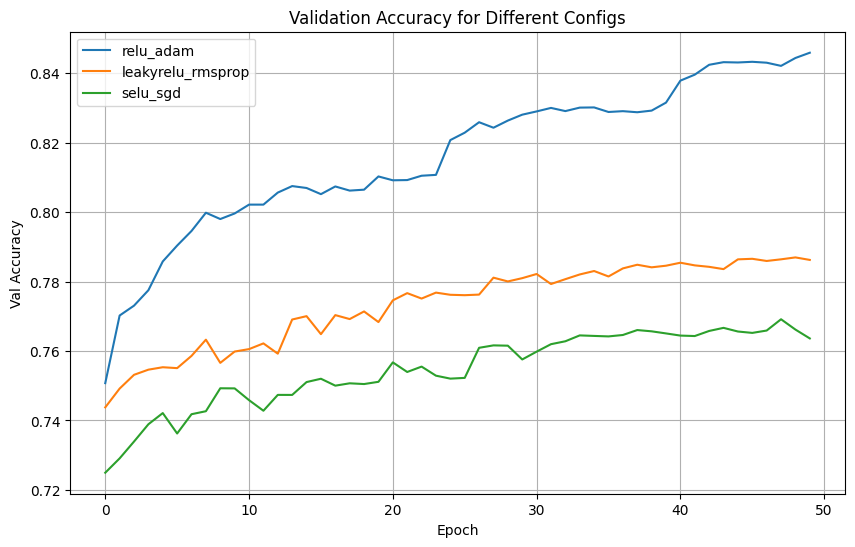

In [ ]:
plt.figure(figsize=(10,6))
for key, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=key)
plt.title("Validation Accuracy for Different Configs")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()



Best Configuration: relu_adam - Accuracy: 0.8465


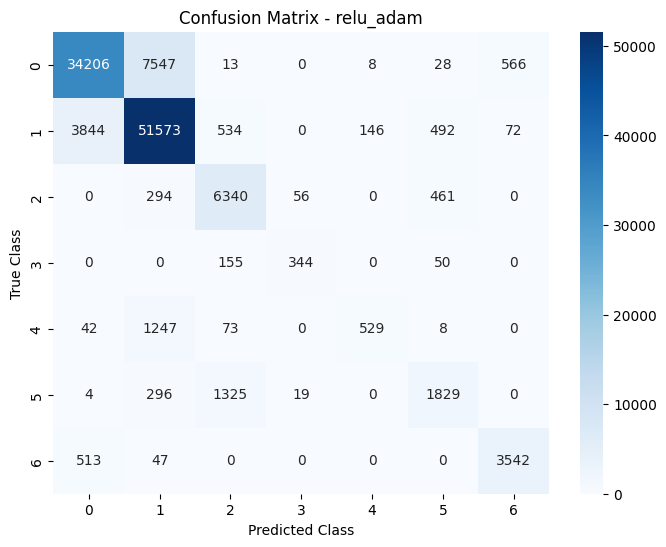

Classification Report:

              precision    recall  f1-score        support
0              0.885959  0.807355  0.844832   42368.000000
1              0.845404  0.910203  0.876607   56661.000000
2              0.751185  0.886589  0.813290    7151.000000
3              0.821002  0.626594  0.710744     549.000000
4              0.774524  0.278568  0.409760    1899.000000
5              0.637727  0.526634  0.576881    3473.000000
6              0.847368  0.863481  0.855349    4102.000000
accuracy       0.846476  0.846476  0.846476       0.846476
macro avg      0.794738  0.699918  0.726780  116203.000000
weighted avg   0.846981  0.846476  0.843004  116203.000000


In [ ]:
best_key = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest Configuration: {best_key} - Accuracy: {results[best_key]['accuracy']:.4f}")

cm_best = results[best_key]['confusion_matrix']
plt.figure(figsize=(8,6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_key}')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

print("Classification Report:\n")
print(pd.DataFrame(results[best_key]['report']).T)


The final tuned MLP architecture included:

3 hidden layers with 256, 128, and 64 neurons.

Activation functions: ReLU, LeakyReLU, and SELU were experimented with.

Batch Normalization and Dropout (rates 0.3–0.5) to reduce overfitting.

L2 regularization applied to all Dense layers to penalize large weights.

Optimizers tested: Adam, RMSprop, and SGD with momentum.

Learning rate scheduling: ReduceLROnPlateau used to dynamically reduce learning rate.

EarlyStopping helped halt training when the model stopped improving on validation set.

The best-performing configuration reached 84.6% accuracy, with a weighted F1-score of 0.843, which is strong considering the class imbalance in the dataset.

Despite improvements, the model struggled on minority classes such as class 4 and 5, as shown by their lower precision/recall.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print("RF Classification Report:\n")
print(classification_report(y_test, y_rf, digits=4))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


RandomForestClassifier performed better overall, especially on minority classes, due to the following:

Q- Why Tree-Based Models Often Outperform MLPs on Tabular Data
Tree ensembles capture hierarchical feature interactions naturally without needing extensive feature engineering or scaling.

They handle heterogeneous data types and missing values robustly.

Decision trees partition the feature space in ways that are often more compatible with tabular patterns, while MLPs assume more continuous, smooth interactions.

Tree-based models are also less sensitive to hyperparameters and require less tuning than deep networks for structured data.

📤 Final Recommendation
While the MLP showed strong performance with careful tuning, Random Forest remains the stronger choice for structured datasets like UCI Forest CoverType, unless there’s a specific reason (e.g., deployment constraint or integration with deep pipelines) to prefer neural networks.